In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### already exported from sql server and saved as seperate csv file

In [2]:
data = pd.read_csv('telecom.csv')
data.head()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charge,inter_min,inter_calls,inter_charge,custservice_calls,churns
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [82]:
data.shape

(4617, 21)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               4617 non-null   object 
 1   account_length      4617 non-null   int64  
 2   area_code           4617 non-null   int64  
 3   phone               4617 non-null   object 
 4   international_plan  4617 non-null   object 
 5   vmail_plan          4617 non-null   object 
 6   vmail_message       4617 non-null   int64  
 7   day_mins            4617 non-null   float64
 8   day_calls           4617 non-null   int64  
 9   day_charge          4617 non-null   float64
 10  eve_mins            4617 non-null   float64
 11  eve_calls           4617 non-null   int64  
 12  eve_charge          4617 non-null   float64
 13  night_mins          4617 non-null   float64
 14  night_calls         4617 non-null   int64  
 15  night_charge        4617 non-null   float64
 16  inter_

In [4]:
#int_cols = ['account_length','area_code','vmail_message','day_calls','eve_calls',
            #'night_calls','inter_calls','custservice_calls']
##int_cols = data[int_cols].apply(pd.to_numeric)

In [5]:
#float_cols = ['day_mins','day_charge','eve_mins','eve_charge','night_mins',
              #'night_charge','inter_min','inter_charge']
##float_cols = data[float_cols].apply(pd.to_numeric)

In [6]:
data.dtypes

state                  object
account_length          int64
area_code               int64
phone                  object
international_plan     object
vmail_plan             object
vmail_message           int64
day_mins              float64
day_calls               int64
day_charge            float64
eve_mins              float64
eve_calls               int64
eve_charge            float64
night_mins            float64
night_calls             int64
night_charge          float64
inter_min             float64
inter_calls             int64
inter_charge          float64
custservice_calls       int64
churns                 object
dtype: object

In [7]:
data.corr()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,inter_min,inter_calls,inter_charge,custservice_calls
account_length,1.000000,-0.020394,-0.012983,0.002002,0.032783,0.001999,-0.006778,0.015598,-0.006775,-0.002077,-0.009482,-0.002095,0.003483,0.023485,0.003501,0.002620
area_code,-0.020394,1.000000,-0.002597,-0.018900,-0.013179,-0.018903,0.011513,-0.011528,0.011533,0.002794,0.015316,0.002782,-0.007292,-0.011531,-0.007386,0.021046
vmail_message,-0.012983,-0.002597,1.000000,0.009028,-0.003846,0.009025,0.017872,-0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.007423,0.005202,-0.006951
day_mins,0.002002,-0.018900,0.009028,1.000000,-0.002823,1.000000,-0.010260,0.012990,-0.010268,0.009604,0.005165,0.009591,-0.012314,0.000166,-0.012261,-0.008149
day_calls,0.032783,-0.013179,-0.003846,-0.002823,1.000000,-0.002821,-0.006430,0.003923,-0.006429,0.010730,-0.013299,0.010724,0.012951,0.010889,0.013055,-0.008747
day_charge,0.001999,-0.018903,0.009025,1.000000,-0.002821,1.000000,-0.010255,0.012992,-0.010262,0.009606,0.005164,0.009593,-0.012315,0.000163,-0.012262,-0.008155
eve_mins,-0.006778,0.011513,0.017872,-0.010260,-0.006430,-0.010255,1.000000,0.001135,1.000000,-0.018830,0.014226,-0.018837,0.000165,0.005749,0.000172,-0.015598
eve_calls,0.015598,-0.011528,-0.006508,0.012990,0.003923,0.012992,0.001135,1.000000,0.001151,0.002610,-0.015463,0.002624,-0.002798,0.005198,-0.002831,0.007730
eve_charge,-0.006775,0.011533,0.017878,-0.010268,-0.006429,-0.010262,1.000000,0.001151,1.000000,-0.018839,0.014231,-0.018846,0.000163,0.005751,0.000170,-0.015611
night_mins,-0.002077,0.002794,0.004672,0.009604,0.010730,0.009606,-0.018830,0.002610,-0.018839,1.000000,0.025742,0.999999,-0.004549,-0.014651,-0.004500,-0.013871


In [8]:
print(data.columns)

Index(['state', 'account_length', 'area_code', 'phone', 'international_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charge', 'inter_min', 'inter_calls', 'inter_charge',
       'custservice_calls', 'churns'],
      dtype='object')


In [9]:
for i,col in enumerate(data.columns):
    print(i+1,'column is',col)

1 column is state
2 column is account_length
3 column is area_code
4 column is phone
5 column is international_plan
6 column is vmail_plan
7 column is vmail_message
8 column is day_mins
9 column is day_calls
10 column is day_charge
11 column is eve_mins
12 column is eve_calls
13 column is eve_charge
14 column is night_mins
15 column is night_calls
16 column is night_charge
17 column is inter_min
18 column is inter_calls
19 column is inter_charge
20 column is custservice_calls
21 column is churns


In [10]:
Counter(data.churns)

Counter({' False.': 3961, ' True.': 656})

In [11]:
Counter(data.international_plan)

Counter({' no': 4171, ' yes': 446})

In [12]:
data['vmail_plan'].value_counts()

 no     3381
 yes    1236
Name: vmail_plan, dtype: int64

In [13]:
data['area_code'].value_counts()

415    2299
408    1161
510    1157
Name: area_code, dtype: int64

In [14]:
data['churns'].value_counts()

 False.    3961
 True.      656
Name: churns, dtype: int64

In [15]:
data['churns'].unique()

array([' False.', ' True.'], dtype=object)

In [16]:
np.count_nonzero(data['state'].unique())

51

In [17]:
#int_cols.describe()

In [18]:
#float_cols.describe()

In [19]:
selected_cols = ['state','area_code','international_plan','vmail_plan','vmail_message','day_mins',
                'day_calls','day_charge','eve_mins','eve_calls','eve_charge','night_mins','night_calls','night_charge',
                'inter_min','inter_calls','inter_charge','custservice_calls','churns']

In [20]:
df = data[selected_cols]

In [21]:
df.head()

,state,area_code,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,inter_min,inter_calls,inter_charge,custservice_calls,churns
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## EDA

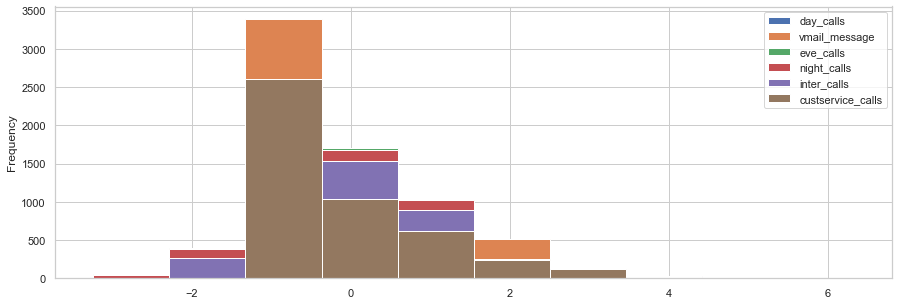

In [81]:
rcParams['figure.figsize'] = 15,5
rcParams['figure.facecolor'] = 'none'
df[['day_calls','vmail_message','eve_calls','night_calls','inter_calls','custservice_calls']].plot.hist()

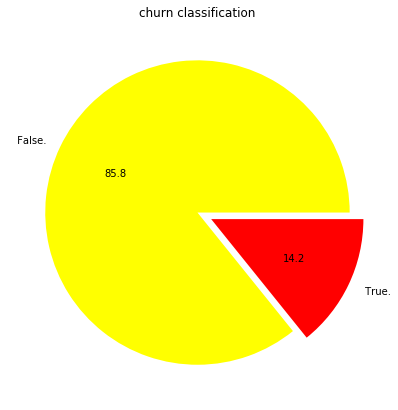

In [23]:
labels = df['churns'].value_counts().index
values = df['churns'].value_counts().values
colors = ['yellow','red']
explode = [0,0.1]
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f')
plt.title("churn classification")
plt.show()

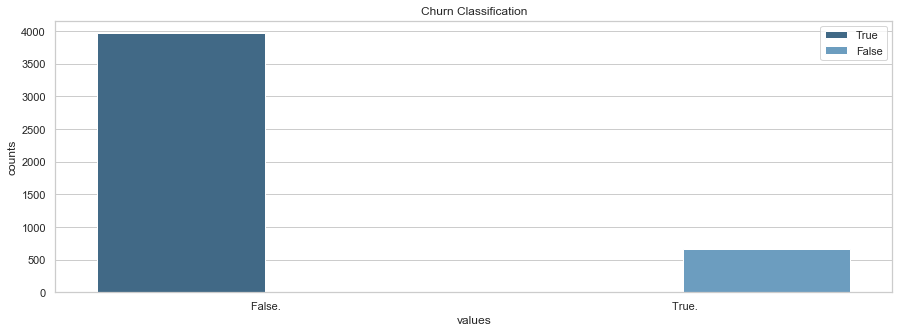

In [24]:
sb.set(style='whitegrid')
sb.barplot(x = df['churns'].value_counts().index, y = df['churns'].value_counts().values,
                hue = ['True','False'],palette="Blues_d")
plt.xlabel('values')
plt.ylabel('counts')
plt.title('Churn Classification')
plt.show()

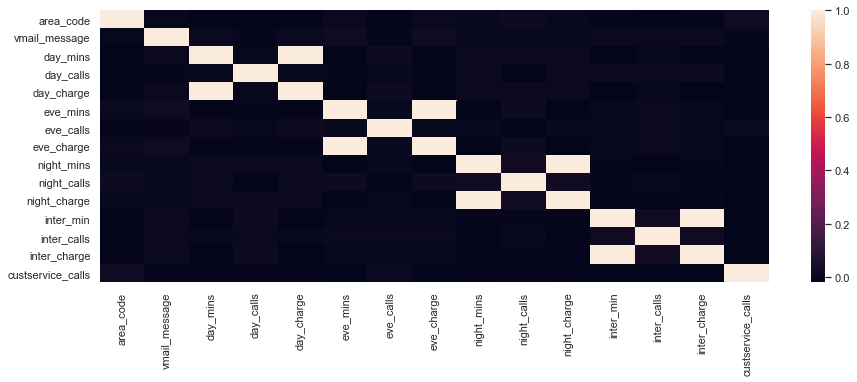

In [25]:
sb.heatmap(df.corr())

churns   False.   True.
state                  
AK           64       5
AL          104      10
AR           62      15
AZ           74       7
CA           31      13
CO           81      10
CT           78      14
DC           73       9
DE           75      14
FL           73      12
GA           67      10
HI           74       5
IA           59       6
ID           97      13
IL           72       7
IN           76      13
KS           78      18
KY           77      13
LA           66       7
MA           83      14
MD           72      20
ME           77      18
MI           81      17
MN           94      18
MO           73      11
MS           75      16
MT           73      19
NC           71      12
ND           73       7
NE           73       6
NH           80      11
NJ           81      25
NM           76       8
NV           72      17
NY           91      18
OH           95      15
OK           65      15
OR           90      17
PA           60       8
RI           83 

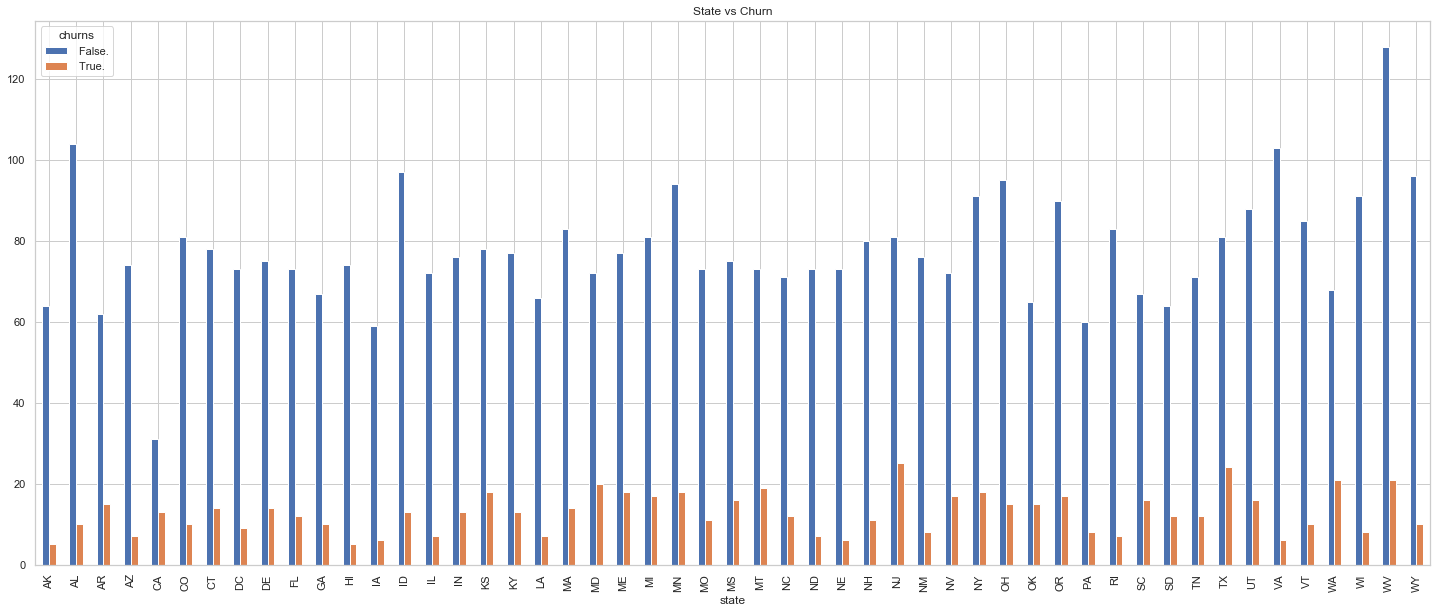

In [26]:
statewise = pd.crosstab(df.state,df.churns,normalize=False)
print(statewise)
rcParams['figure.figsize'] = 25,10
statewise.plot(kind='bar',title='State vs Churn')

churns      False.   True.
area_code                 
408            996     165
415           1981     318
510            984     173


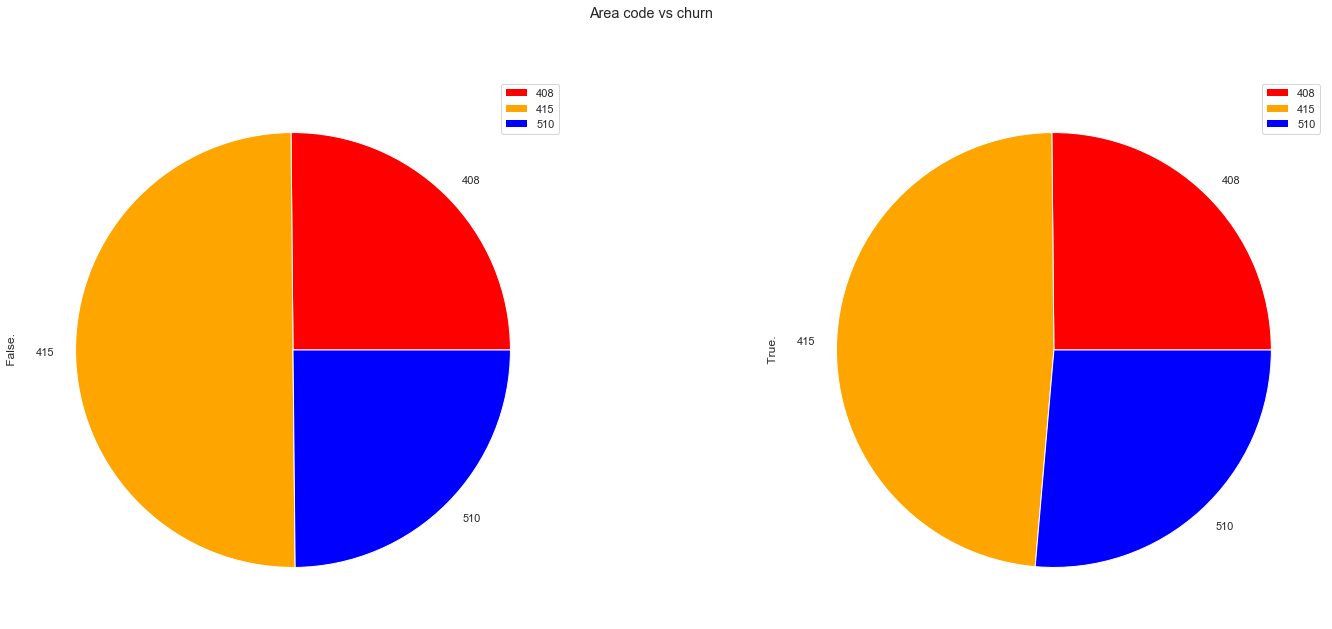

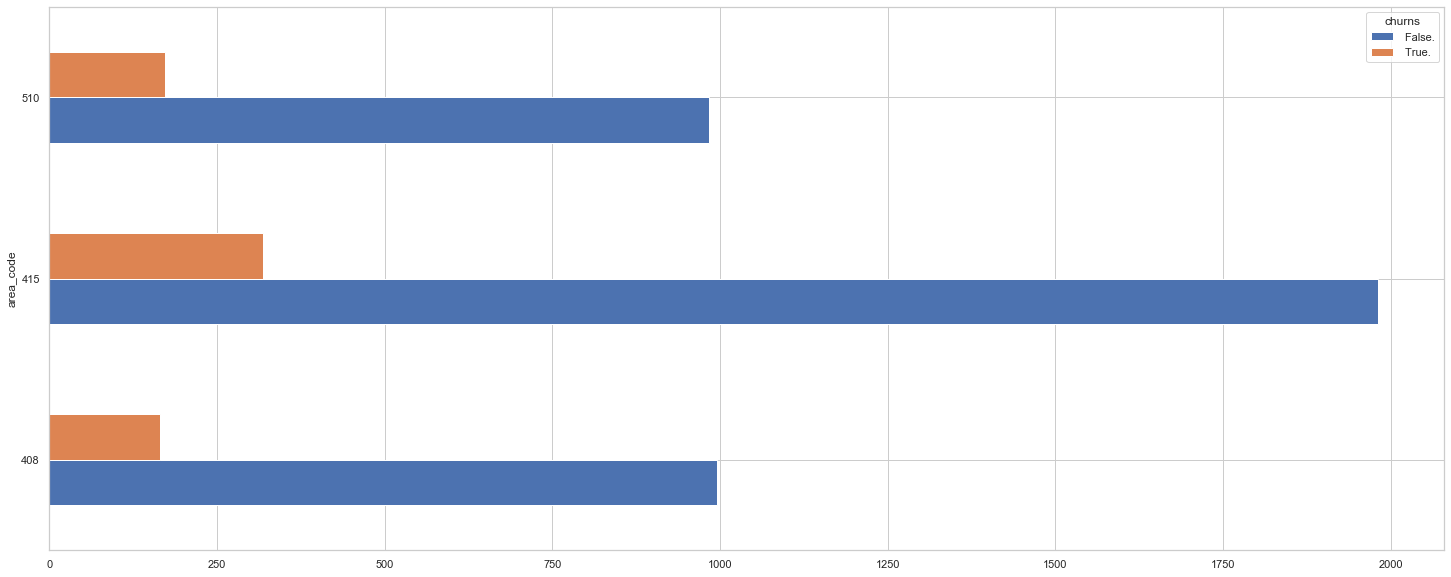

In [27]:
areawise = pd.crosstab(df.area_code,df.churns)
print(areawise)
colors = ['red','orange','blue']
areawise.plot(kind='pie',subplots=True,colors=colors,title='Area code vs churn')
areawise.plot(kind='barh')

churns             False.     True.
state area_code                    
AK    408        0.003249  0.000000
      415        0.006931  0.000866
      510        0.003682  0.000217
AL    408        0.006281  0.000866
      415        0.012346  0.000866
...                   ...       ...
WV    415        0.013645  0.001733
      510        0.007581  0.001949
WY    408        0.005198  0.000000
      415        0.011263  0.001083
      510        0.004332  0.001083

[153 rows x 2 columns]


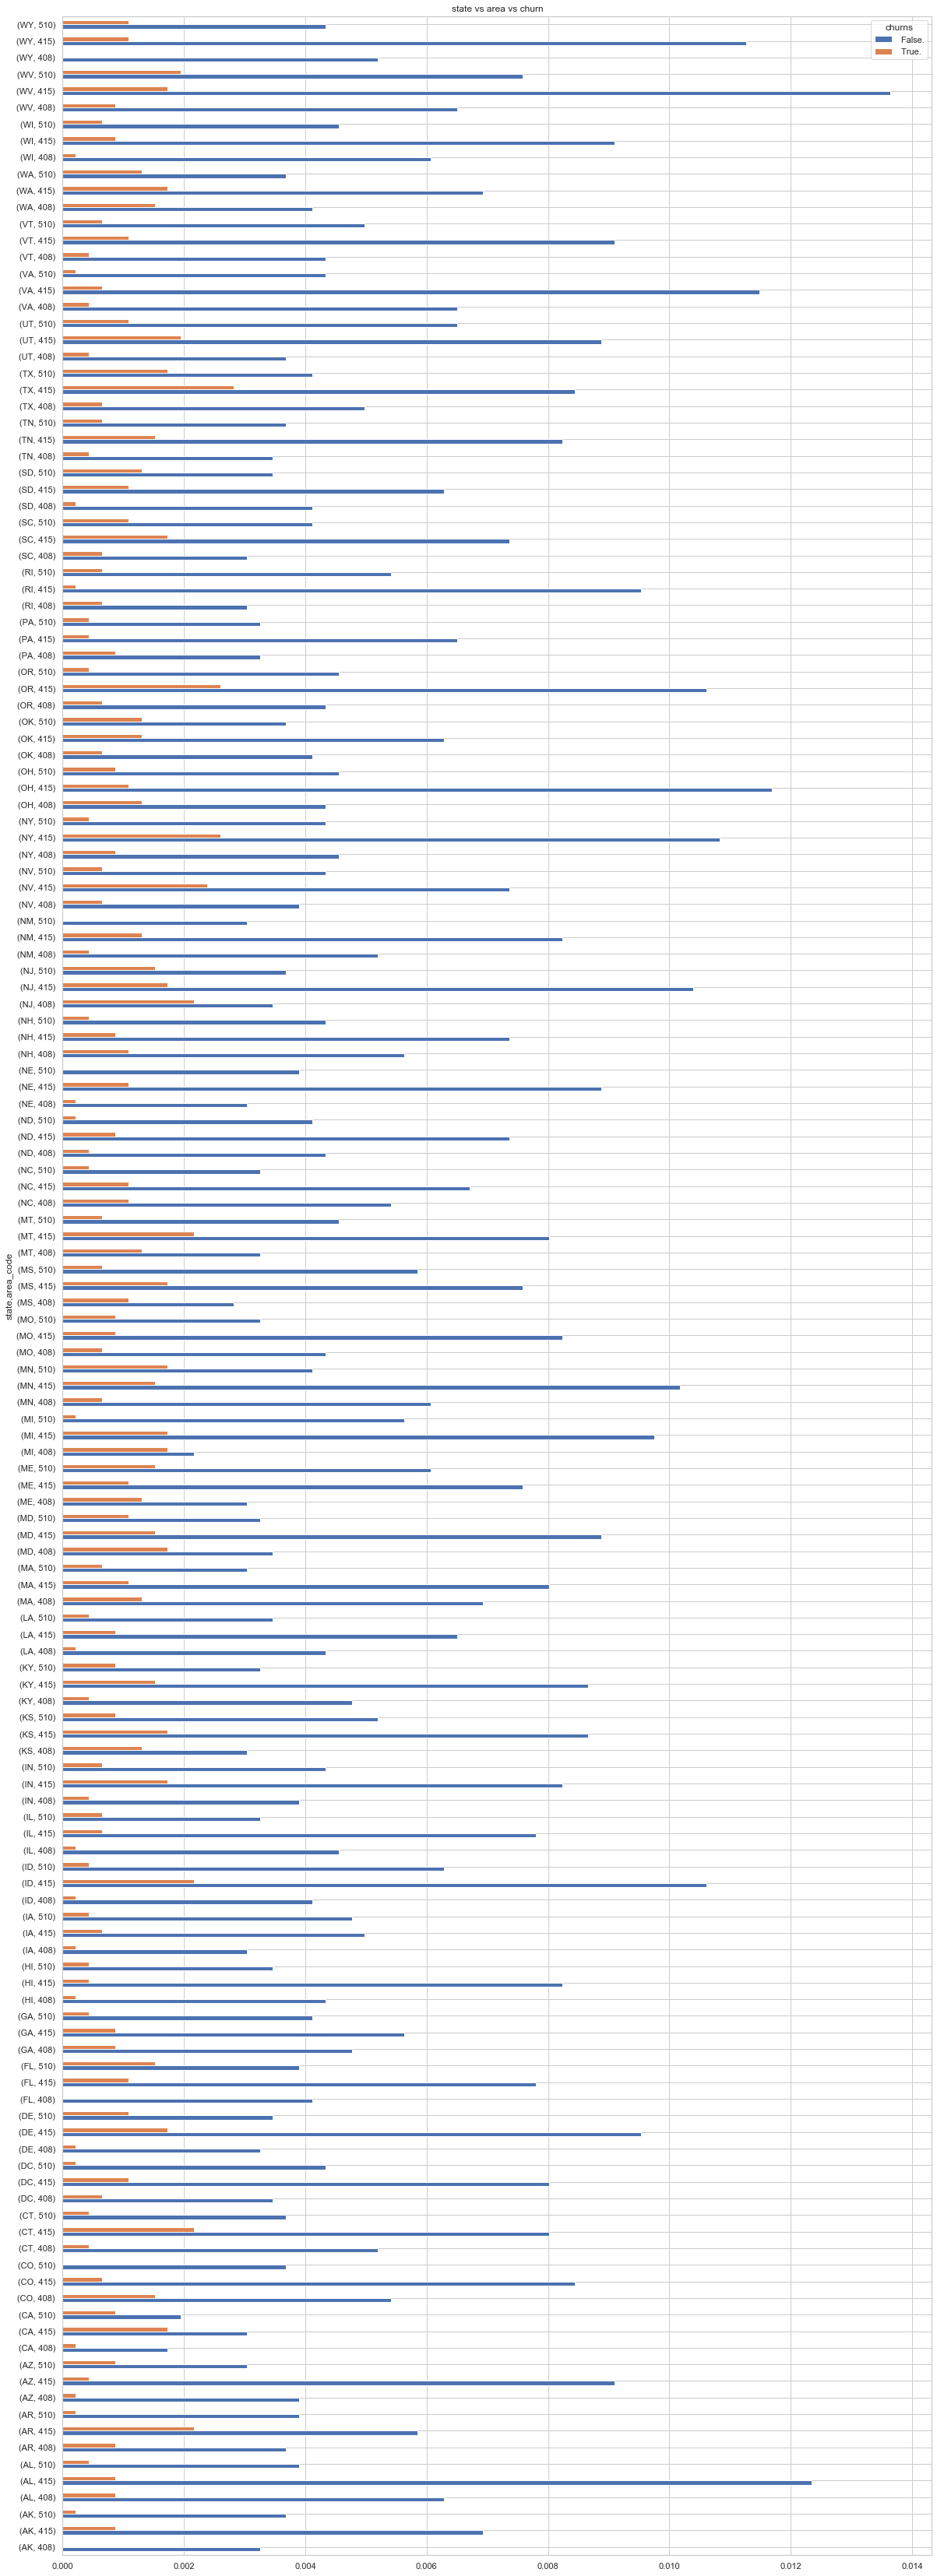

In [28]:
rcParams['figure.figsize']=20,60
cd = pd.crosstab([df.state,df.area_code],df.churns,normalize=True)
print(cd)
cd.plot(kind='barh',stacked=False,grid=True,title='state vs area vs churn')

churns               False.   True.
international_plan                 
 no                    3701     470
 yes                    260     186


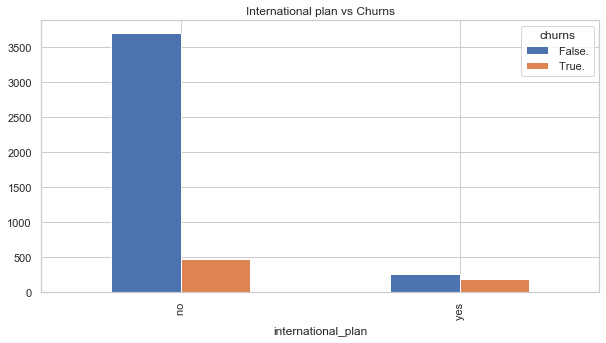

In [29]:
rcParams['figure.figsize']=10,5
i_plan = pd.crosstab(df.international_plan,df.churns,normalize=False)
print(i_plan)
i_plan.plot(kind='bar',title='International plan vs Churns')

churns       False.   True.
vmail_plan                 
 no            2822     559
 yes           1139      97


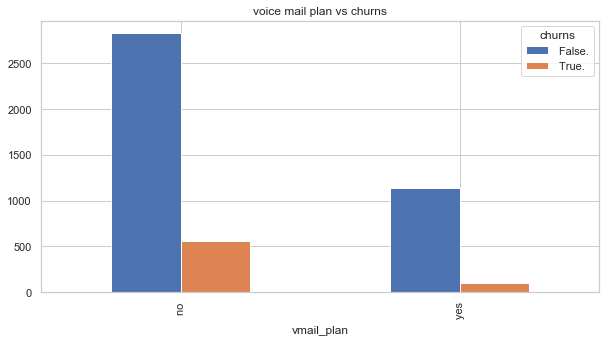

In [30]:
rcParams['figure.figsize']=10,5
v_plan = pd.crosstab(df.vmail_plan,df.churns)
print(v_plan)
v_plan.plot(kind='bar',title='voice mail plan vs churns')

churns              False.   True.
custservice_calls                 
0                      835     116
1                     1475     176
2                      919     112
3                      551      65
4                      130     104
5                       34      55
6                       10      18
7                        6       7
8                        1       1
9                        0       2


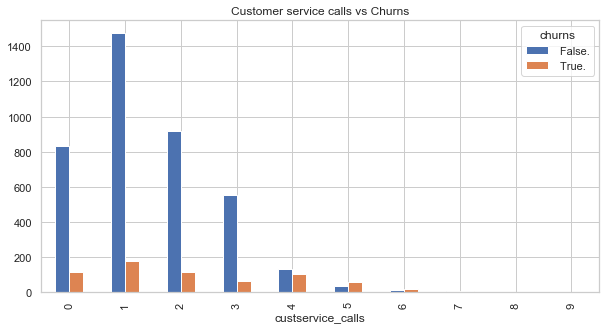

In [31]:
rcParams['figure.figsize']=10,5
cust_ser = pd.crosstab(df.custservice_calls,df.churns)
print(cust_ser)
cust_ser.plot(kind='bar',title='Customer service calls vs Churns')

## Modeling

In [32]:
df.head()

,state,area_code,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,inter_min,inter_calls,inter_charge,custservice_calls,churns
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [33]:
con_var = ['vmail_message','day_mins','day_calls','day_charge','eve_mins','eve_calls','eve_charge','night_mins',
           'night_calls','night_charge','inter_min','inter_calls','inter_charge','custservice_calls']
cat_var = ['state','area_code','international_plan','vmail_plan']

In [34]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [35]:
df[con_var] = df[con_var]
for cat_var in df:
    df[cat_var]=enc.fit_transform(df[cat_var])

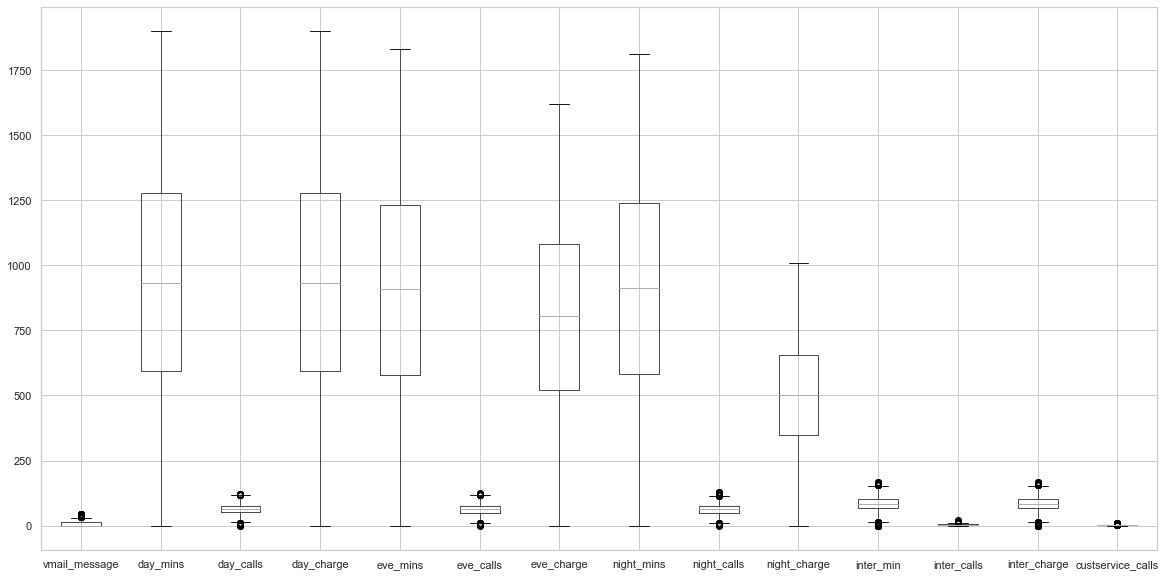

In [36]:
rcParams['figure.figsize']=20,10
df[con_var].boxplot()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

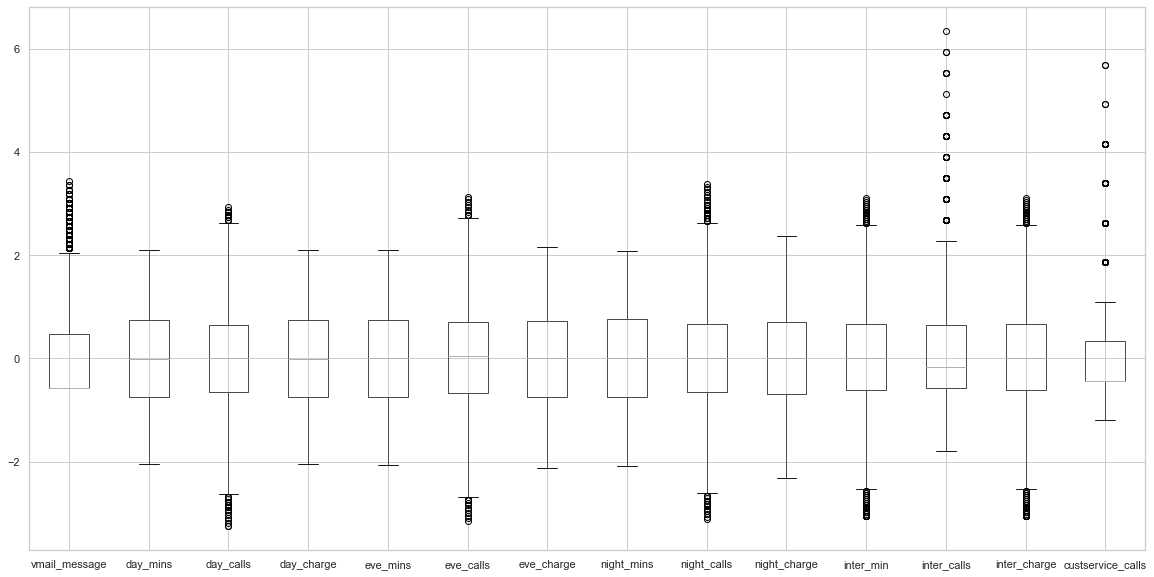

In [38]:
df[con_var] = scaler.fit_transform(df[con_var])
df[con_var].boxplot()

In [39]:
df[con_var].head()

,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,inter_min,inter_calls,inter_charge,custservice_calls
0,1.173434,1.613988,0.502486,1.613988,-0.070533,-0.060247,-0.071780,0.964068,-0.450484,0.914701,-0.106585,-0.583487,-0.106585,-0.433885
1,1.260434,-0.383462,1.160062,-0.383462,-0.113905,0.142420,-0.113995,1.167884,0.153329,1.118138,1.257599,-0.583487,1.257599,-0.433885
2,-0.566564,1.266130,0.704817,1.266130,-1.606838,0.497086,-1.609985,-0.842793,0.203647,-0.791398,0.704551,0.230398,0.704551,-1.199068
3,-0.566564,1.970598,-1.470241,1.970598,-2.031433,-0.617580,-2.071711,-0.077911,-0.551119,-0.079368,-1.360158,1.044284,-1.360158,0.331298
4,-0.566564,-0.282824,0.654234,-0.282824,-1.132021,1.105085,-1.124514,-0.304628,1.059048,-0.287429,-0.069715,-0.583487,-0.069715,1.096480


In [40]:
df.head()

,state,area_code,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,inter_min,inter_calls,inter_charge,custservice_calls,churns
0,16,1,0,1,1.173434,1.613988,0.502486,1.613988,-0.070533,-0.060247,-0.071780,0.964068,-0.450484,0.914701,-0.106585,-0.583487,-0.106585,-0.433885,0
1,35,1,0,1,1.260434,-0.383462,1.160062,-0.383462,-0.113905,0.142420,-0.113995,1.167884,0.153329,1.118138,1.257599,-0.583487,1.257599,-0.433885,0
2,31,1,0,0,-0.566564,1.266130,0.704817,1.266130,-1.606838,0.497086,-1.609985,-0.842793,0.203647,-0.791398,0.704551,0.230398,0.704551,-1.199068,0
3,35,0,1,0,-0.566564,1.970598,-1.470241,1.970598,-2.031433,-0.617580,-2.071711,-0.077911,-0.551119,-0.079368,-1.360158,1.044284,-1.360158,0.331298,0
4,36,1,1,0,-0.566564,-0.282824,0.654234,-0.282824,-1.132021,1.105085,-1.124514,-0.304628,1.059048,-0.287429,-0.069715,-0.583487,-0.069715,1.096480,0


In [41]:
for cat_var in df:
    chi2,p,dof,expected = scipy.stats.chi2_contingency(pd.crosstab(df[cat_var],df.churns))
    print(cat_var,'p:',p)

state p: 0.0003716382614441669
area_code p: 0.672816318136138
international_plan p: 5.1469217589105615e-68
vmail_plan p: 1.0310215433169948e-13
vmail_message p: 0.0006688694462750693
day_mins p: 3.8449411383977337e-16
day_calls p: 0.09766117563933419
day_charge p: 3.8449411383977337e-16
eve_mins p: 0.03521412476182637
eve_calls p: 0.7722300039042607
eve_charge p: 0.009682244929138746
night_mins p: 0.9215397993138239
night_calls p: 0.7572364334338466
night_charge p: 0.6874787173150513
inter_min p: 0.00046439156252502844
inter_calls p: 2.1807473661962473e-05
inter_charge p: 0.00046439156252502844
custservice_calls p: 1.1865150956557101e-94
churns p: 0.0


In [42]:
final_cols = ['state','international_plan','vmail_plan','vmail_message','day_mins','day_calls','day_charge','eve_mins',
              'eve_charge','inter_min','inter_calls','inter_charge','custservice_calls','churns']
df_final = df[final_cols]
df_final.head()

,state,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_charge,inter_min,inter_calls,inter_charge,custservice_calls,churns
0,16,0,1,1.173434,1.613988,0.502486,1.613988,-0.070533,-0.071780,-0.106585,-0.583487,-0.106585,-0.433885,0
1,35,0,1,1.260434,-0.383462,1.160062,-0.383462,-0.113905,-0.113995,1.257599,-0.583487,1.257599,-0.433885,0
2,31,0,0,-0.566564,1.266130,0.704817,1.266130,-1.606838,-1.609985,0.704551,0.230398,0.704551,-1.199068,0
3,35,1,0,-0.566564,1.970598,-1.470241,1.970598,-2.031433,-2.071711,-1.360158,1.044284,-1.360158,0.331298,0
4,36,1,0,-0.566564,-0.282824,0.654234,-0.282824,-1.132021,-1.124514,-0.069715,-0.583487,-0.069715,1.096480,0


In [43]:
X = df_final.iloc[:,:-1]
y = df_final.churns

In [44]:
X.head(2)

,state,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_charge,inter_min,inter_calls,inter_charge,custservice_calls
0,16,0,1,1.173434,1.613988,0.502486,1.613988,-0.070533,-0.071780,-0.106585,-0.583487,-0.106585,-0.433885
1,35,0,1,1.260434,-0.383462,1.160062,-0.383462,-0.113905,-0.113995,1.257599,-0.583487,1.257599,-0.433885


In [45]:
y.head(2)

0    0
1    0
Name: churns, dtype: int32

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [47]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,KFold 

In [48]:
X1 = X
y1 = y

In [49]:
split_seed = 10

In [50]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state=split_seed,test_size=0.3)

In [51]:
models = []
models.append(('LG', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGB-TREE', XGBClassifier(booster='gbtree')))
models.append(('XGB-DART', XGBClassifier(booster='dart')))
models.append(('GNB', GaussianNB()))

In [52]:
seed = 10
results = []
names = []
output = []
score = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=seed)
    result = model_selection.cross_val_score(model,np.array(X1_train),np.array(y1_train),cv=kfold,scoring=score)
    results.append(result)
    names.append(name)
    value = name,result.mean()
    output.append(value)
print(output)

[('LG', 0.8610289930663553), ('SVC', 0.8545250525167359), ('DTC', 0.9062244893076405), ('RFC', 0.9489307640407502), ('KNC', 0.8669075179083267), ('MLP', 0.9124092620860269), ('XGB-TREE', 0.9439757681320311), ('XGB-DART', 0.9439757681320311), ('GNB', 0.8570042252644978)]


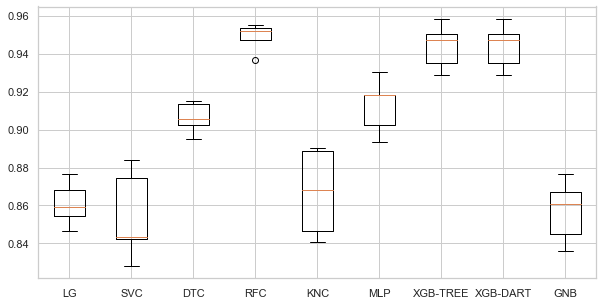

In [53]:
rcParams['figure.figsize'] = 10,5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
split_seed = 10
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state=split_seed,test_size=0.3)

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10)
model.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [62]:
y1_predict = model.predict(X1_test)
accuracy_score(y1_predict,y1_test).round(4)*100

95.45

In [59]:
pd.crosstab(y1_predict,y1_test)

churns,0,1
row_0,,
0,1190,53
1,10,133


In [64]:
print(classification_report(y1_predict,y1_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1243
           1       0.72      0.93      0.81       143

    accuracy                           0.95      1386
   macro avg       0.85      0.94      0.89      1386
weighted avg       0.96      0.95      0.96      1386



In [65]:
y1_train.shape

(3231,)

In [66]:
np.array(y1_train).reshape(3231,1)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [67]:
y1_predict.shape

(1386,)

In [68]:
y1_predict = pd.DataFrame(y1_predict,columns=['y_predict_churn'])
y1_predict.shape

(1386, 1)

In [69]:
proba = model.predict_proba(X1_test)
proba

array([[0.97, 0.03],
       [0.14, 0.86],
       [0.91, 0.09],
       ...,
       [0.98, 0.02],
       [0.62, 0.38],
       [0.72, 0.28]])

In [70]:
y1_test1 = np.array(y1_test).reshape(1386,1)

In [75]:
con_data = np.concatenate([y1_test1,np.array(y1_predict),np.array(proba)],axis=1)
con_data = pd.DataFrame(con_data,columns=['y_test','y_predict','proba_0','proba_1'],index=X1_test.index)
con_data

,y_test,y_predict,proba_0,proba_1
4454,0.0,0.0,0.97,0.03
2118,1.0,1.0,0.14,0.86
42,0.0,0.0,0.91,0.09
3879,0.0,0.0,0.96,0.04
2727,0.0,0.0,0.57,0.43
...,...,...,...,...
1853,0.0,0.0,0.92,0.08
3598,0.0,0.0,0.96,0.04
216,0.0,0.0,0.98,0.02
1235,0.0,0.0,0.62,0.38


## Churn score

In [76]:
proba_train = model.predict_proba(X1_train)

In [77]:
proba_train.shape

(3231, 2)

In [79]:
con_data_train = pd.DataFrame(np.array(proba_train),columns=['proba_0','proba_1'],index = X1_train.index)
con_data_train['ChurnRiskScore'] = (100 * con_data_train['proba_1']).astype(int)
con_data_train.shape

(3231, 3)

In [83]:
final = data[['state','area_code','phone','churns']]
final.head()

,state,area_code,phone,churns
0,KS,415,382-4657,False.
1,OH,415,371-7191,False.
2,NJ,415,358-1921,False.
3,OH,408,375-9999,False.
4,OK,415,330-6626,False.


In [86]:
final_score_train = con_data_train.merge(final,left_index=True,right_index=True)
final_score_train.shape

(3231, 7)

In [87]:
final_score_train = final_score_train [['state','area_code','phone','churns','ChurnRiskScore']]
final_score_train.head()

,state,area_code,phone,churns,ChurnRiskScore
4271,MO,415,370-4667,False.,8
3079,WV,510,421-1326,True.,93
1158,CA,415,330-8351,False.,3
4106,AK,415,336-7199,False.,2
1432,TN,415,374-6217,False.,1


In [88]:
con_data['ChurnRiskScore'] = (100 * con_data['proba_1']).astype(int)
final_score_test = con_data.merge(final,left_index=True,right_index=True)
final_score_test.head()

,y_test,y_predict,proba_0,proba_1,ChurnRiskScore,state,area_code,phone,churns
4454,0.0,0.0,0.97,0.03,3,HI,408,369-6323,False.
2118,1.0,1.0,0.14,0.86,86,TX,510,346-2020,True.
42,0.0,0.0,0.91,0.09,9,AR,510,353-7289,False.
3879,0.0,0.0,0.96,0.04,4,OK,415,412-6547,False.
2727,0.0,0.0,0.57,0.43,43,PA,415,409-2917,False.


In [90]:
final_score_test = final_score_test [['state','area_code','phone','churns','ChurnRiskScore']]
final_score_test.head()

,state,area_code,phone,churns,ChurnRiskScore
4454,HI,408,369-6323,False.,3
2118,TX,510,346-2020,True.,86
42,AR,510,353-7289,False.,9
3879,OK,415,412-6547,False.,4
2727,PA,415,409-2917,False.,43


In [92]:
final_score = pd.concat([final_score_train,final_score_test]).sort_index(axis=0)
final_score.head(20)

,state,area_code,phone,churns,ChurnRiskScore
0,KS,415,382-4657,False.,0
1,OH,415,371-7191,False.,1
2,NJ,415,358-1921,False.,1
3,OH,408,375-9999,False.,17
4,OK,415,330-6626,False.,3
5,AL,510,391-8027,False.,13
6,MA,510,355-9993,False.,11
7,MO,415,329-9001,False.,2
8,LA,408,335-4719,False.,7
9,WV,415,330-8173,False.,13


In [93]:
final_score.shape

(4617, 5)

In [94]:
final_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           4617 non-null   object
 1   area_code       4617 non-null   int64 
 2   phone           4617 non-null   object
 3   churns          4617 non-null   object
 4   ChurnRiskScore  4617 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 198.4+ KB


In [108]:
final_score[(final_score.ChurnRiskScore > 50)]#.count()

,state,area_code,phone,churns,ChurnRiskScore
10,IN,415,329-6603,True.,96
15,NY,415,351-7269,True.,81
21,CO,408,393-7984,True.,97
33,AZ,408,360-1596,True.,93
41,MD,408,383-6029,True.,96
...,...,...,...,...,...
4576,WV,510,350-7785,True.,84
4577,KS,415,347-1864,True.,90
4592,SD,415,333-1661,True.,89
4597,OR,408,393-8963,True.,87
